In [1]:
import os
import numpy as np
import pickle
import scipy.stats.distributions
import sklearn.metrics.cluster

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import head_orientation_lib
# reload(head_orientation_lib)

import saldat_head_orientation
# reload(saldat_head_orientation)

import saldat_saliency
# reload(saldat_saliency)

In [4]:
#dirpath1 = u'/home/u9168/salnet/Datasets/Dataset1/results/'
#dirpath2 = u'/home/u9168/salnet/Datasets/Dataset2/Formated_Data/Experiment_1/'
dirpath1 = u'./data/head-orientation/dataset1'
dirpath2 = u'./data/head-orientation/dataset2/Experiment_1'
dirpath3 = u'./data/head-orientation/dataset3/sensory/orientation'
ext1 = '.txt'
ext2 = '.csv'
ext3 = '.csv'
headoren = saldat_head_orientation.HeadOrientation(dirpath1, dirpath2, dirpath3, ext1, ext2, ext3)


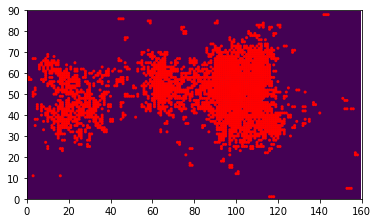

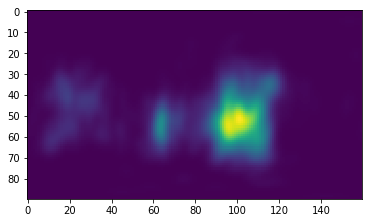

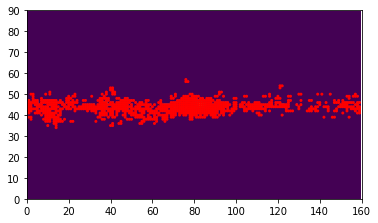

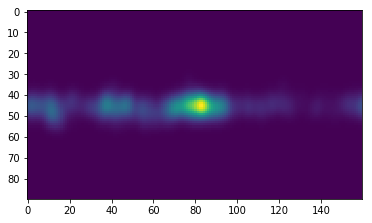

In [79]:
#venise

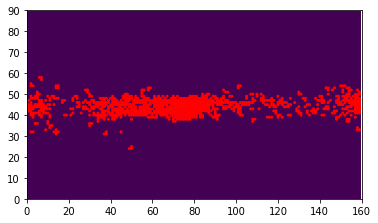

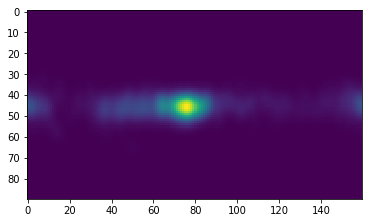

In [74]:
#VENISE TOTAL

In [263]:
dataset = saldat_head_orientation.HeadOrientation._DATASET3

dirpath, filename_list, f_parse, f_extract_direction = headoren.load_filename_list(dataset, 'sport')
series_ds = headoren.load_series_ds(filename_list, f_parse)
vector_ds = headoren.headpos_to_headvec(series_ds, f_extract_direction)
vector_ds = headoren.cutoff_vel_acc(vector_ds)

var = 20
salsal = saldat_saliency.Fixation(var)

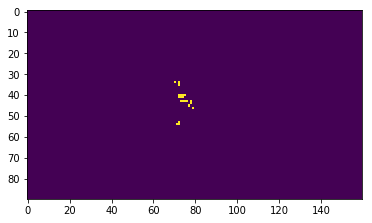

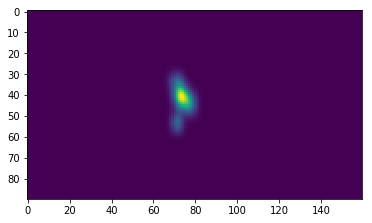

In [264]:
bfilter = True
time = 2.9
fixation_list = headoren.get_fixation(vector_ds, time, _bp=3, _ap=1, filter_fix=bfilter)
plt.imshow(headoren.create_fixation_map(fixation_list, dataset))
plt.figure()
heat_map0 = salsal.create_saliency(fixation_list, dataset)
plt.imshow(heat_map0)#rhinos-13.23

In [34]:

stats.entropy([.5, .5])

0.6931471805599453

In [4]:

def accumulate_saliency(saliency_ds):
    #one item is tuple(time, fmap smap)
    #calculate cumulated fmap and smap
    total_fmap = np.zeros(shape=saliency_ds[0][1].shape)
    total_salmap = np.zeros(shape=saliency_ds[0][2].shape)
    for t, fmap, salmap in saliency_ds:
        total_fmap += fmap
        total_salmap += salmap
    return total_fmap, total_salmap

def visualize_totalsaliency(dataset, topic, total_fmap, total_salmap):
    x, y = np.where(total_fmap > 0)
    idx_list = np.arange(len(x))
    np.random.shuffle(idx_list)

    plt.figure()
    #plt.imshow(total_fmap)
    #plt.scatter(y, x, color='red', s=15, alpha=.8)
    plt.scatter(y[idx_list[:600]], x[idx_list[:600]], alpha=0.1)
    plt.axis([0, 160, 0, 90])
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)
    plt.gca().invert_yaxis()
    plt.savefig('./fig/total_fmap_{}_{}'.format(dataset, topic), dpi=300)

    plt.figure()
    plt.imshow(total_salmap)

    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)
    plt.savefig('./fig/total_salmap_{}_{}'.format(dataset, topic), dpi=300)

def shannon_entropy(image, base=2):
    #https://github.com/scikit-image/scikit-image/blob/master/skimage/measure/entropy.py
    _, counts = np.unique(image, return_counts=True)
    return scipy.stats.distributions.entropy(counts, base=base)

import skimage.filters.rank
import skimage.morphology

1 paris 6.96142196900996 9.518592665394829 0.5572108892013728
1 roller 6.4341951964998865 9.518592665394829 0.34668961806670123
1 venise 7.646044836816465 9.518592665394829 0.952686336908837
1 timelapse 7.352923077557223 9.518303854069595 0.7792545539832589
1 diving 7.6047431333950835 9.518592665394829 0.8917237029762701


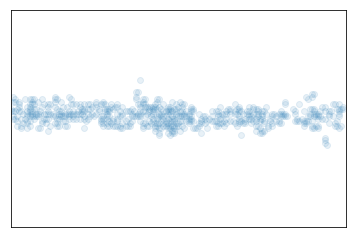

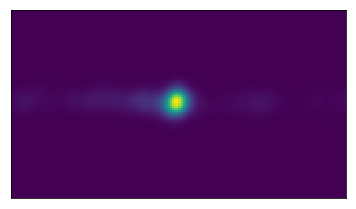

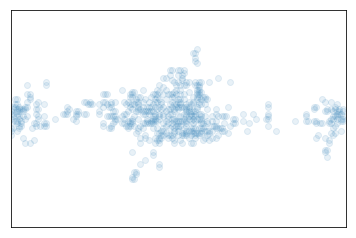

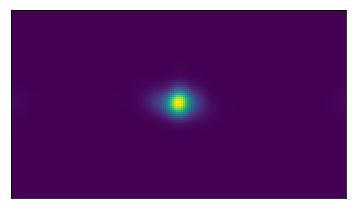

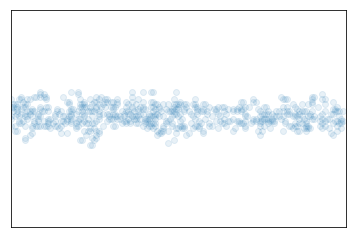

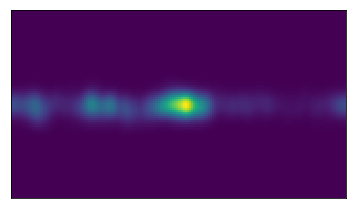

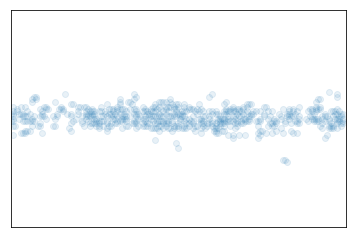

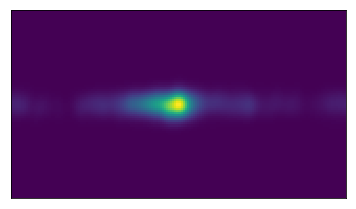

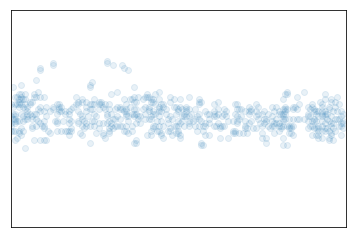

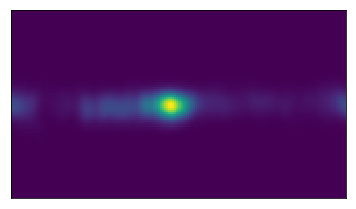

In [11]:
dataset = 1
topic_list = ['paris', 'roller', 'venise', 'timelapse', 'diving']
for topic in topic_list:
    saliency_ds = pickle.load(open('./data/saliency_ds{}_topic{}'.format(dataset, topic)))
    total_fmap, total_salmap = accumulate_saliency(saliency_ds)
    visualize_totalsaliency(dataset, topic, total_fmap, total_salmap)
    
    temp = (total_salmap/total_salmap.max())
    entropy = scipy.stats.distributions.entropy(temp.ravel())
    entropy2 = sklearn.metrics.cluster.entropy(temp)
    entropy3 = skimage.filters.rank.entropy(temp -  temp.mean(), skimage.morphology.disk(5)).mean()
    print dataset, topic, entropy, entropy2, entropy3


2 0 6.928703998517819 9.518592665394829 0.43899551145330534
2 1 8.138261112133197 9.518592665394829 1.186933882147222
2 2 8.45823772953931 9.518592665394829 1.5482758320176842
2 3 6.9848796069135695 9.518592665394829 0.43436142131824657
2 4 8.421296832521946 9.518592665394829 1.3036707148671423
2 5 7.8666857197175535 9.518592665394829 0.8014590913913783
2 6 7.575981223218736 9.518592665394829 0.8396017862622868
2 7 7.60752027888347 9.518592665394829 0.7456895629378703
2 8 8.423400308191203 9.518592665394829 1.3792599418893503


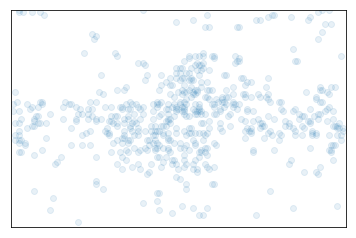

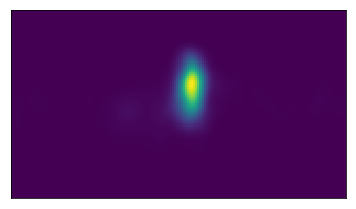

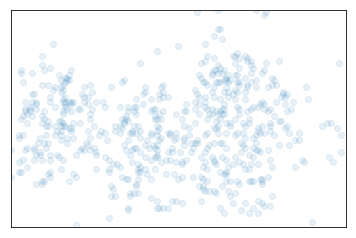

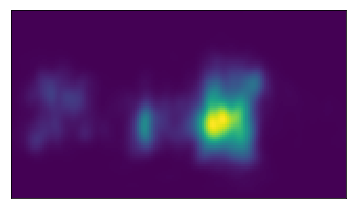

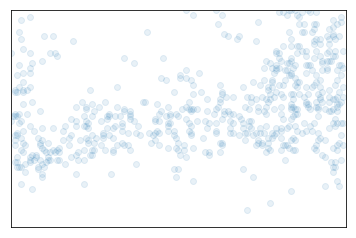

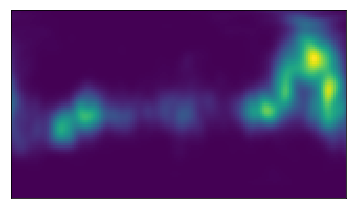

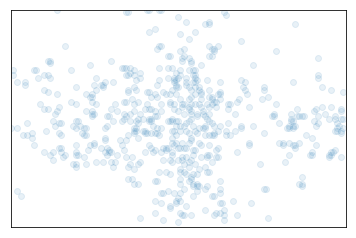

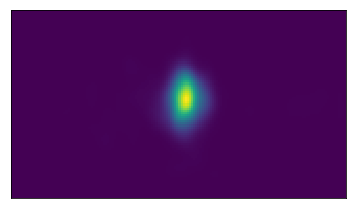

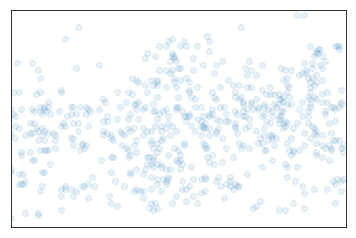

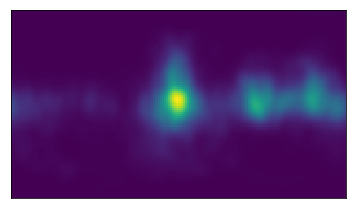

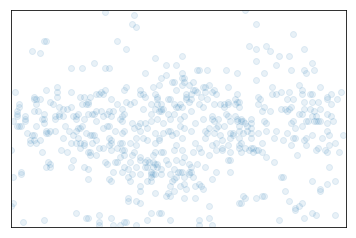

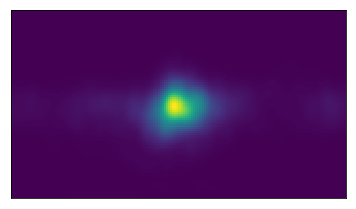

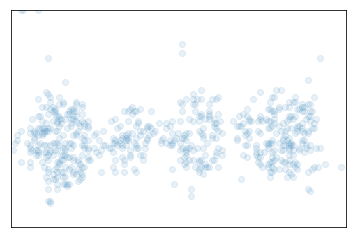

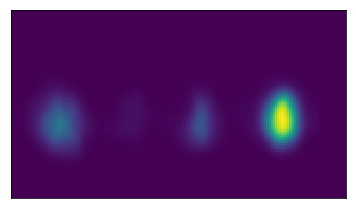

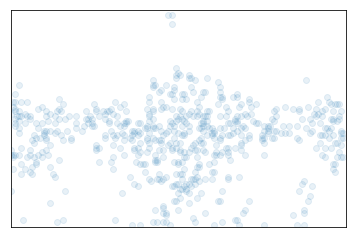

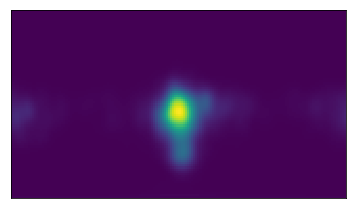

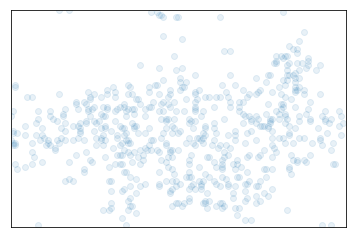

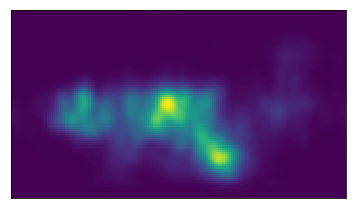

In [12]:
dataset = 2
topic_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
for topic in topic_list:
    saliency_ds = pickle.load(open('./data/saliency_ds{}_topic{}'.format(dataset, topic)))
    total_fmap, total_salmap = accumulate_saliency(saliency_ds)
    visualize_totalsaliency(dataset, topic, total_fmap, total_salmap)
    
    temp = (total_salmap/total_salmap.max())
    entropy = scipy.stats.distributions.entropy(temp.ravel())
    entropy2 = sklearn.metrics.cluster.entropy(temp)
    entropy3 = skimage.filters.rank.entropy(temp -  temp.mean(), skimage.morphology.disk(5)).mean()
    print dataset, topic, entropy, entropy2, entropy3

3 coaster2_ 6.478241252657519 9.518400124511341 0.34985980664108846
3 coaster_ 6.07052754177047 9.518592665394829 0.2647402509035375
3 diving 7.41428671298012 9.518592665394829 0.7233508158484199
3 drive 6.853759501613064 9.51768989474248 0.4528441006748069
3 game 6.009200286141138 9.518592665394829 0.2524582932139194
3 landscape 6.919867361807602 9.516878587485412 0.503660057132908
3 pacman 5.985006167313635 9.515687005507829 0.26578409826789545
3 panel 7.162383276709052 9.518592665394829 0.6106651762246129
3 ride 6.370076257759458 9.518400124511341 0.3385663261812459
3 sport 6.854430075965652 9.518592665394829 0.49211006509577


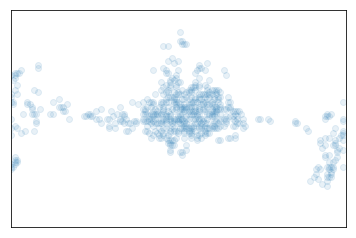

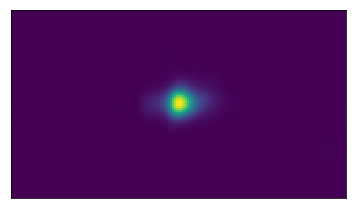

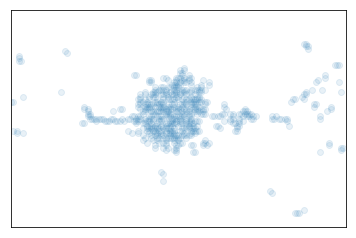

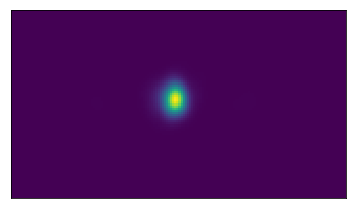

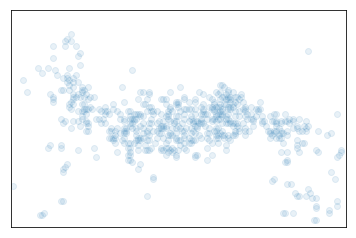

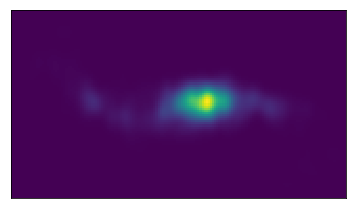

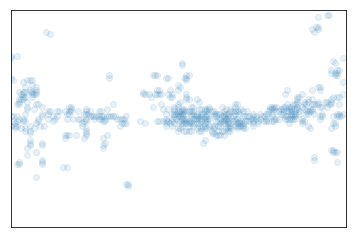

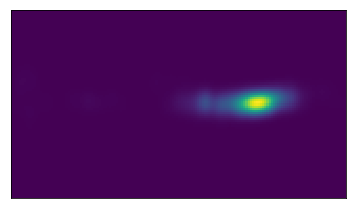

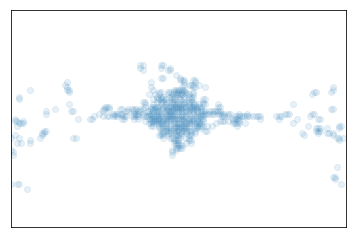

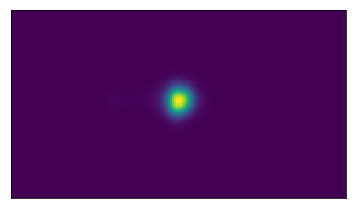

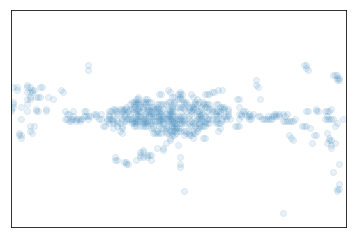

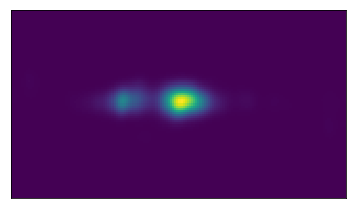

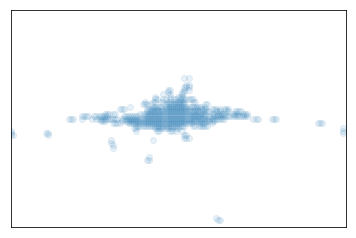

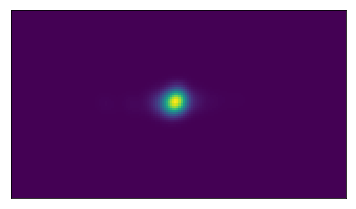

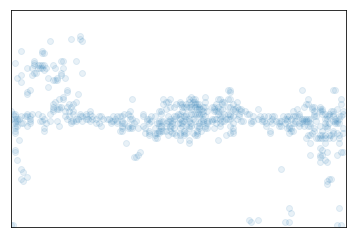

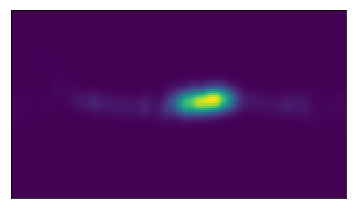

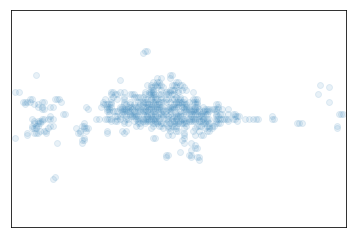

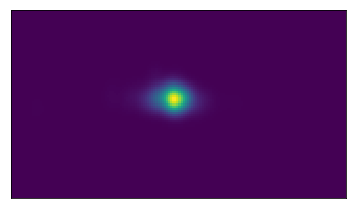

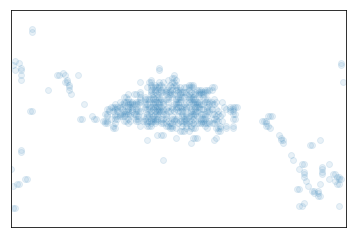

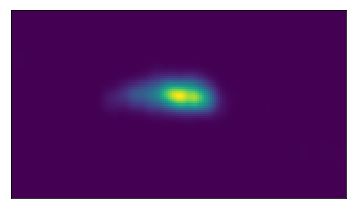

In [13]:
dataset = 3
topic_list = ['coaster2_', 'coaster_', 'diving', 'drive', 'game', 'landscape', 'pacman', 'panel', 'ride', 'sport']
for topic in topic_list:
    saliency_ds = pickle.load(open('./data/saliency_ds{}_topic{}'.format(dataset, topic)))
    total_fmap, total_salmap = accumulate_saliency(saliency_ds)
    visualize_totalsaliency(dataset, topic, total_fmap, total_salmap)
    
    temp = (total_salmap/total_salmap.max())
    entropy = scipy.stats.distributions.entropy(temp.ravel())
    entropy2 = sklearn.metrics.cluster.entropy(temp)
    entropy3 = skimage.filters.rank.entropy(temp -  temp.mean(), skimage.morphology.disk(5)).mean()
    print dataset, topic, entropy, entropy2, entropy3

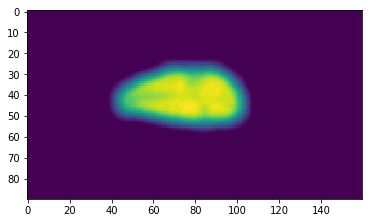

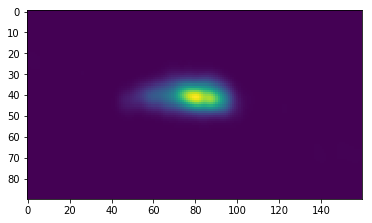

In [72]:
plt.imshow(skimage.filters.rank.entropy(temp -  temp.mean(), skimage.morphology.disk(5)))
plt.figure()
plt.imshow(temp)

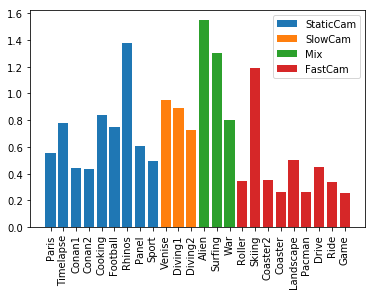

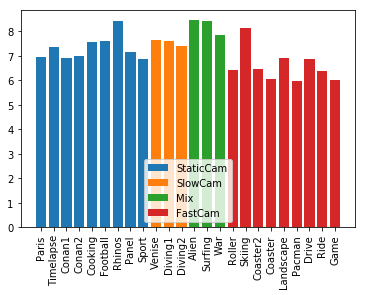

In [44]:
mean_entropy_filter = np.array([0.5572, 0.7792, 0.4389, 0.4343, 0.8396, 0.7456, 1.3792, 0.6106, 0.4921, 0.9526, 0.8917, 0.7233, 1.5482, 1.3036, 0.8014, 0.34668, 1.1869, 0.3498, 0.2647, 0.5036, 0.2657, 0.4528, 0.3385, 0.2524])
entropy_list = np.array([6.9614, 7.3529, 6.9287, 6.984, 7.5759, 7.6075, 8.4234, 7.1623, 6.8544, 7.646, 7.6047, 7.4142, 8.4583, 8.4212, 7.8666, 6.4341, 8.1382, 6.4782, 6.0705, 6.9198, 5.985, 6.8537, 6.37, 6.0092])

y1 = mean_entropy_filter
y2 = entropy_list

x = np.array(['Paris', 'Timelapse', 'Conan1', 'Conan2', 'Cooking', 'Football', 'Rhinos', 'Panel', 'Sport', 'Venise', 'Diving1', 'Diving2', 'Alien', 'Surfing', 'War', 'Roller', 'Skiing', 'Coaster2', 'Coaster', 'Landscape', 'Pacman', 'Drive', 'Ride', 'Game'])
range_list = [np.arange(0, 9), np.arange(9, 12), np.arange(12, 15), np.arange(15, 24)]
color_list = ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'yellow', 'yellow', 'yellow', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
label_list = ['StaticCam', 'SlowCam', 'Mix', 'FastCam']
for i in range(len(range_list)):
    plt.bar(range_list[i], y1[range_list[i]], label=label_list[i])
plt.legend()
plt.xticks(np.arange(len(x)), x, rotation='vertical')
plt.savefig('./fig/bars_entropy1_moveCam', dpi=300)
plt.figure()

for i in range(len(range_list)):
    plt.bar(range_list[i], y2[range_list[i]], label=label_list[i])
plt.legend(loc='lower center')
plt.xticks(np.arange(len(x)), x, rotation='vertical')
plt.savefig('./fig/bars_entropy2_moveCam', dpi=300)



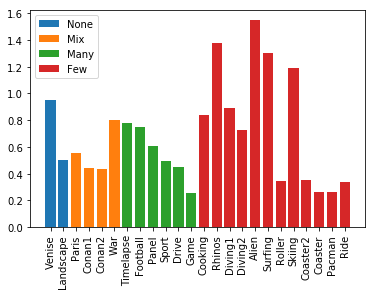

In [51]:
x = np.array(['Venise', 'Landscape', 'Paris', 'Conan1', 'Conan2', 'War', 'Timelapse', 'Football', 'Panel', 'Sport', 'Drive', 'Game', 'Cooking', 'Rhinos', 'Diving1', 'Diving2', 'Alien', 'Surfing', 'Roller', 'Skiing', 'Coaster2', 'Coaster', 'Pacman', 'Ride'])
y1 = np.array([0.9526, 0.5036, 0.5572, 0.4389, 0.4343, 0.8014, 0.7792, 0.7456, 0.6106, 0.4921, 0.4528, 0.2524, 0.8396, 1.3792, 0.8917, 0.7233, 1.5482, 1.3036, 0.34668, 1.1869, 0.3498, 0.2647, 0.2657, 0.3385])
color_list = np.array(['red', 'red', 'green', 'green', 'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
range_list = [np.arange(0, 2), np.arange(2, 6), np.arange(6, 12), np.arange(12, 24)]
label_list = np.array(['None', 'Mix', 'Many', 'Few'])

for i in range(len(range_list)):
    plt.bar(range_list[i], y1[range_list[i]], label=label_list[i])
plt.legend()
plt.xticks(np.arange(len(x)), x, rotation='vertical')
plt.savefig('./fig/bars_entropy1_foreground', dpi=300)
plt.figure()

In [45]:
x = '''Venise
Landscape
Paris
Conan1
Conan2
War
Timelapse
Football
Panel
Sport
Drive
Game
Cooking
Rhinos
Diving1
Diving2
Alien
Surfing
Roller
Skiing
Coaster2
Coaster
Pacman
Ride'''.split('\n'); print x

['Venise', 'Landscape', 'Paris', 'Conan1', 'Conan2', 'War', 'Timelapse', 'Football', 'Panel', 'Sport', 'Drive', 'Game', 'Cooking', 'Rhinos', 'Diving1', 'Diving2', 'Alien', 'Surfing', 'Roller', 'Skiing', 'Coaster2', 'Coaster', 'Pacman', 'Ride']


In [46]:
y = '''0.9526
0.5036
0.5572
0.4389
0.4343
0.8014
0.7792
0.7456
0.6106
0.4921
0.4528
0.2524
0.8396
1.3792
0.8917
0.7233
1.5482
1.3036
0.34668
1.1869
0.3498
0.2647
0.2657
0.3385'''.split('\n')
print map(float, y)

[0.9526, 0.5036, 0.5572, 0.4389, 0.4343, 0.8014, 0.7792, 0.7456, 0.6106, 0.4921, 0.4528, 0.2524, 0.8396, 1.3792, 0.8917, 0.7233, 1.5482, 1.3036, 0.34668, 1.1869, 0.3498, 0.2647, 0.2657, 0.3385]


In [47]:
color_list = '''red
red
green
green
green
green
yellow
yellow
yellow
yellow
yellow
yellow
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue'''.split('\n')
print color_list

['red', 'red', 'green', 'green', 'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
